In [1]:
import os, glob
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
N = 5 # Number of experiments
STATE_RANGE = range(3, 11) # Range of number of states
N_STATE_SETTINGS = len(STATE_RANGE) # Number of number of state settings

results = {i:{
    'accuracy': np.zeros(N), 
    'f1': np.zeros(N), 
    'memory_fit': np.zeros(N),
    'time_fit': np.zeros(N),
    'memory_predict': np.zeros(N),
    'time_predict': np.zeros(N)
} for i in STATE_RANGE}

fields = list(results[3].keys())

for file in glob.glob(os.path.join('experiments', 'hmm', '*')):
    if ('validation' not in file) or (file.endswith('.npy')):
        continue
    else:
        name = os.path.basename(file)
        n_states, repeat = [int(part) for part in name.split('states validation ')]
        with open(file, 'r') as f:
            for line in f:
                key, value = line.strip('\n').split(': ')
                if key in fields:
                    results[n_states][key][repeat] = float(value)

In [3]:
def plot(results, field, xlabel, ylabel, ylim=None, color=None, figsize=None):
    means = np.zeros(N_STATE_SETTINGS)
    errors = np.zeros(N_STATE_SETTINGS)
    for i, n_states in enumerate(STATE_RANGE):
        data = results[n_states][field]
        means[i] = np.mean(data)
        errors[i] = np.std(data) / np.sqrt(N)
    
    labels = [str(i) for i in range(3, 11)]
    x_pos = np.arange(N_STATE_SETTINGS)
    
    # Build the plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(x_pos, means, yerr=errors, align='center', alpha=0.7, color=color, ecolor='black', capsize=10, error_kw=dict(lw=1, capsize=3, capthick=1))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_ylim(ylim)

    # Save the figure and show
    plt.tight_layout()
    plt.savefig('val-{}.pdf'.format(field))
    plt.show()

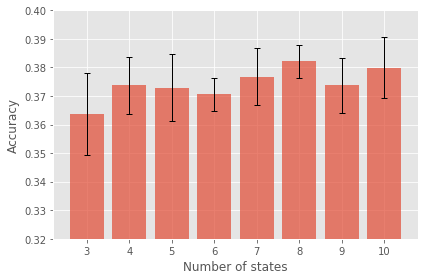

In [4]:
plot(results, 'accuracy', 'Number of states', 'Accuracy', ylim=(0.32, 0.4))

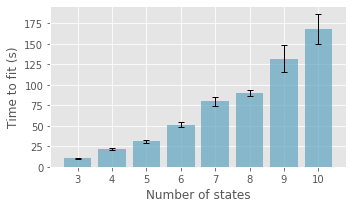

In [5]:
plot(results, 'time_fit', 'Number of states', 'Time to fit (s)', color='#5ea4bf', figsize=(5, 3))

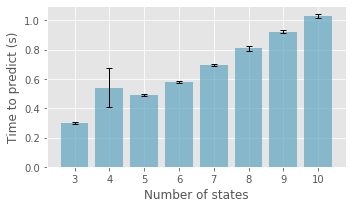

In [6]:
plot(results, 'time_predict', 'Number of states', 'Time to predict (s)', color='#5ea4bf', figsize=(5, 3))

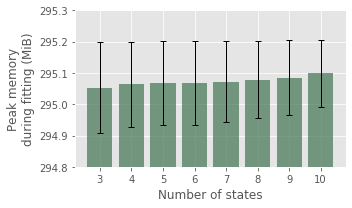

In [7]:
plot(results, 'memory_fit', 'Number of states', 'Peak memory\nduring fitting (MiB)', ylim=(294.8, 295.3), color='#417353', figsize=(5, 3))

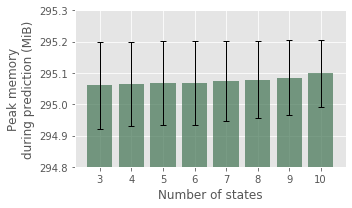

In [8]:
plot(results, 'memory_predict', 'Number of states', 'Peak memory\nduring prediction (MiB)', ylim=(294.8, 295.3), color='#417353', figsize=(5, 3))